<a href="https://colab.research.google.com/github/jidakku/PMU-B-PersonalAI/blob/main/Yolov8_Object_Detection_on_Custom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise
Extract this video into frame and label it into four classes (bus, taxi, car, and pedestrian), then generate the
model to classify those four classes using yolov8
Video link : https://drive.google.com/file/d/1FO5cLEppO5jhBFyu6x23OXOJ7GbBHu_t/view?usp=sharing

In [1]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/107.7 GB disk)


In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

In [3]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="aSuP5D6hm7c94t0zvsKm")
project = rf.workspace("nnjidaa").project("pmu-b")
version = project.version(2)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PMU-B-2 in yolov8:: 100%|██████████| 102/102 [00:00<00:00, 4651.57it/s]


In [23]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz=400 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ret

In [25]:
!ls /content/runs/detect/train2/

args.yaml					    F1_curve.png  R_curve.png  weights
confusion_matrix.png				    P_curve.png   results.csv
events.out.tfevents.1734268228.a0648c299eb6.3871.0  PR_curve.png  results.png


[Errno 2] No such file or directory: '{HOME}'
/content


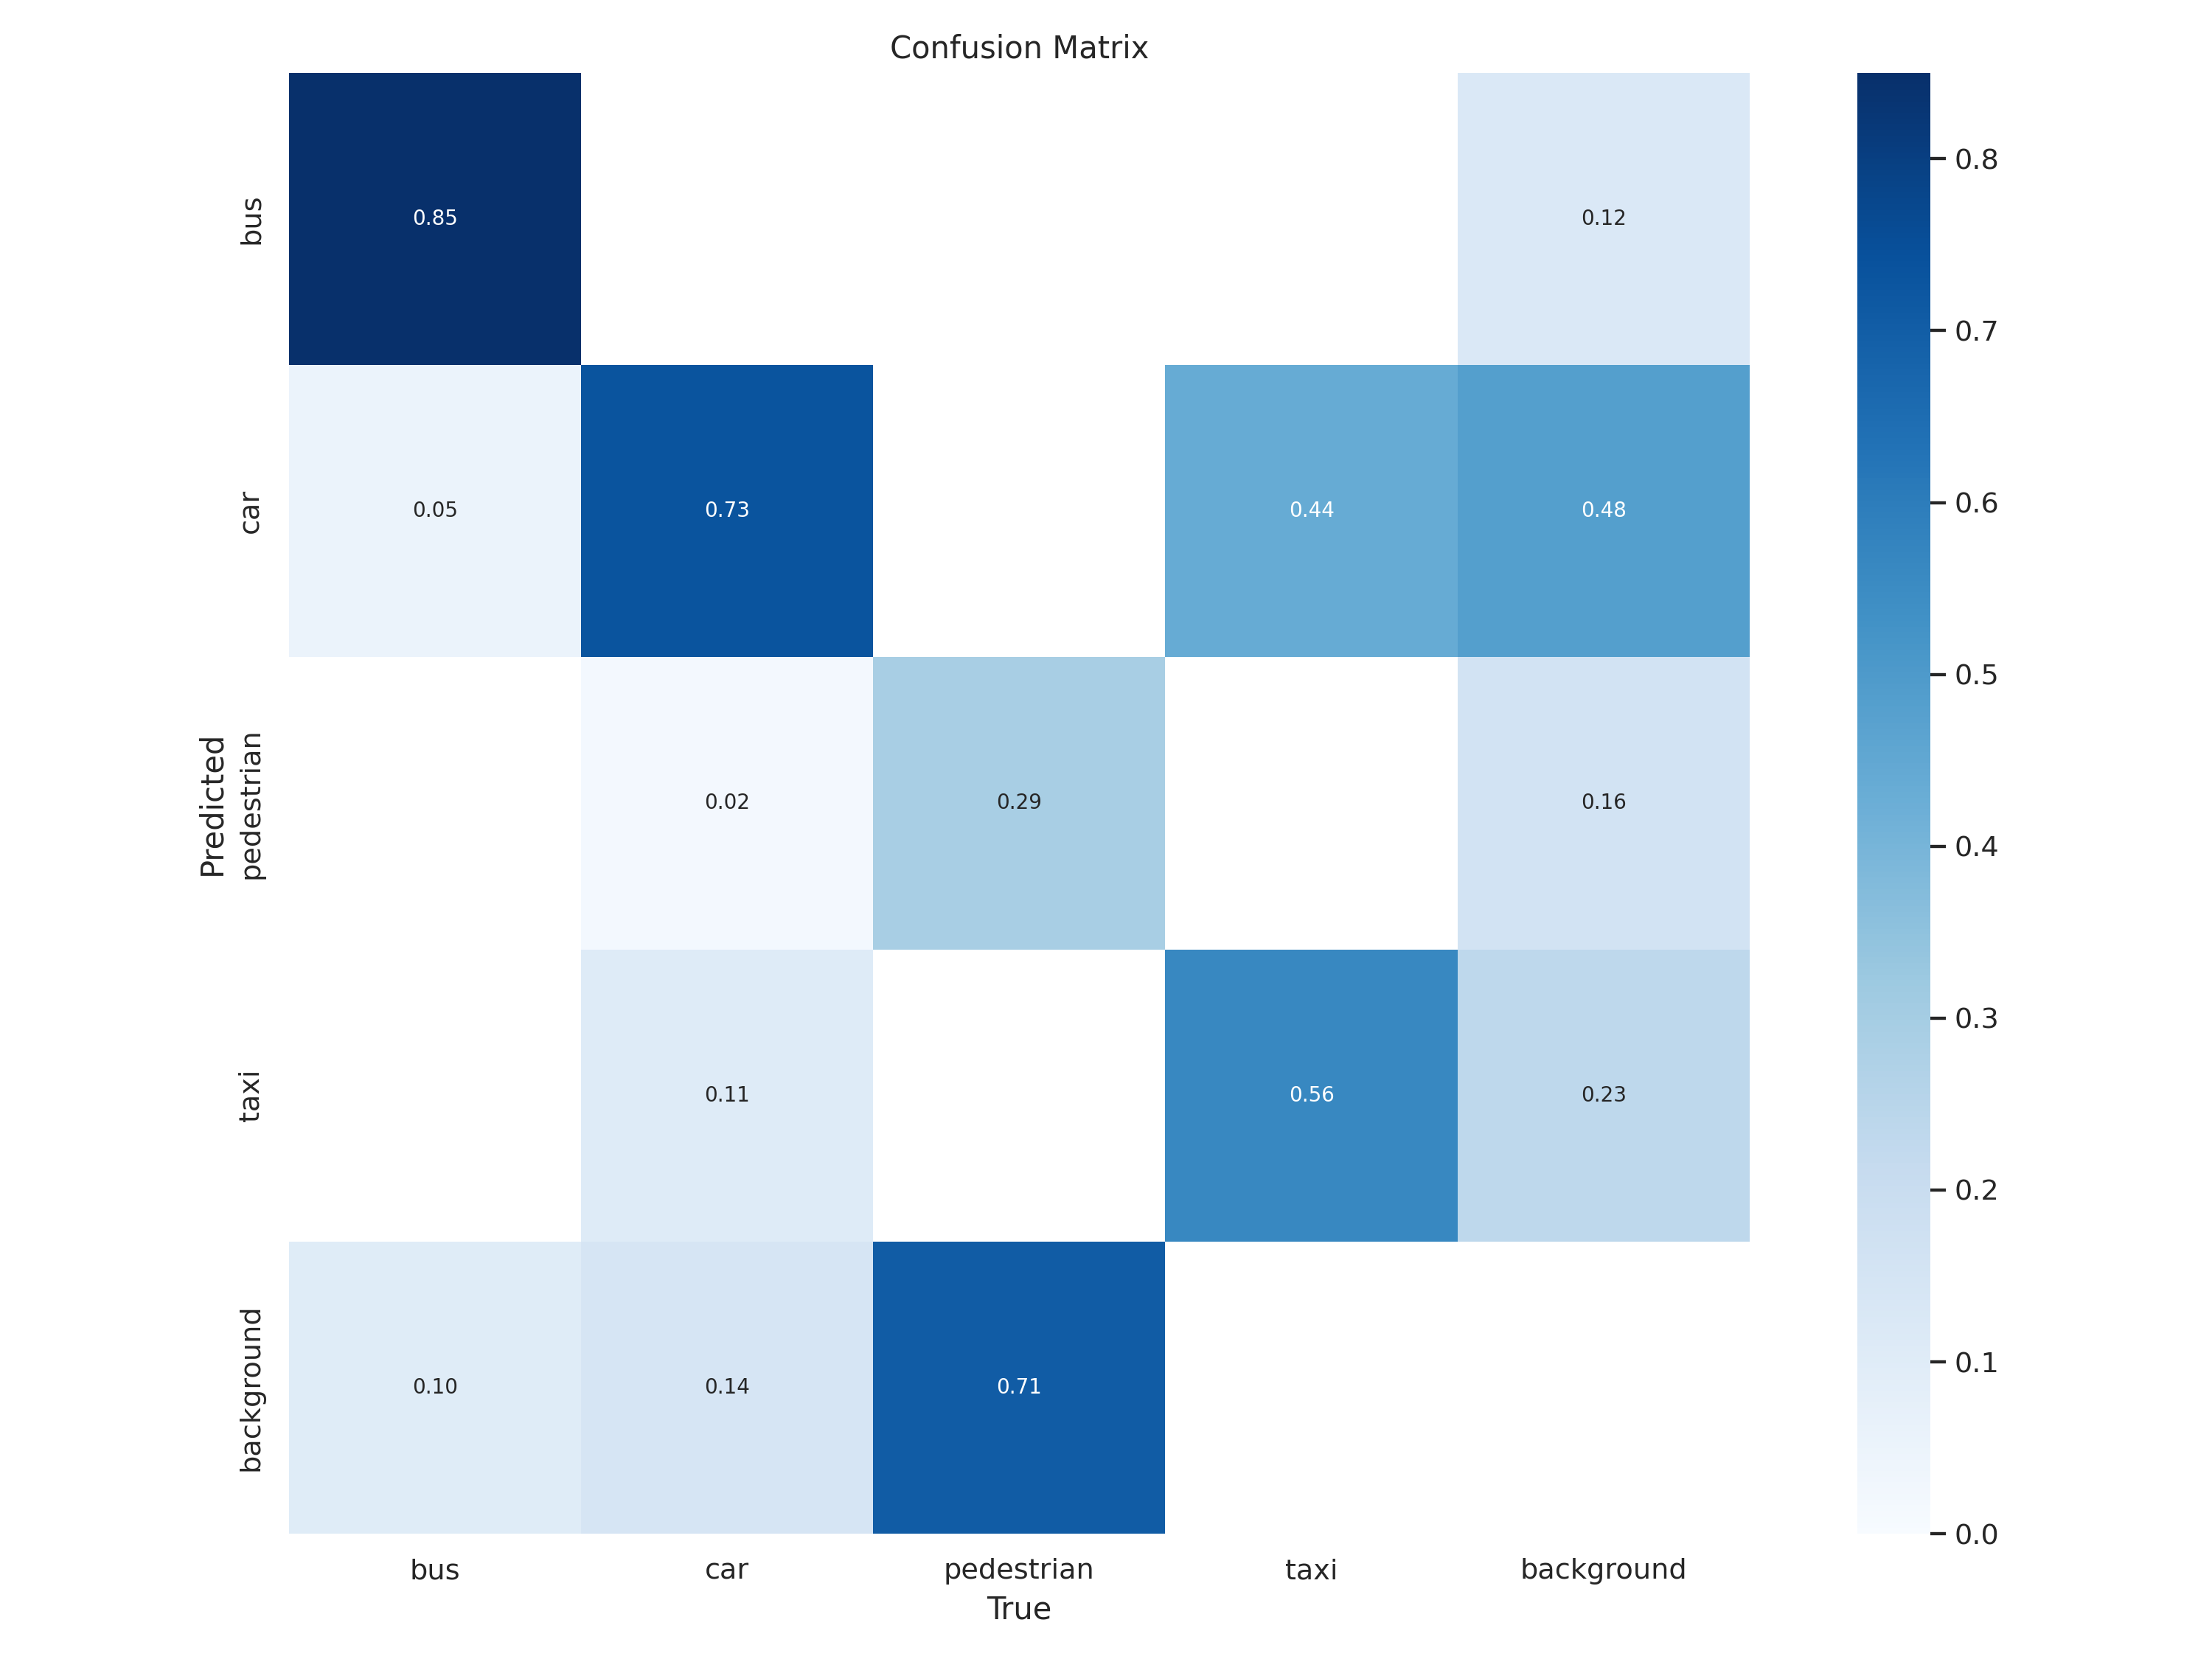

In [26]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=600)

[Errno 2] No such file or directory: '{HOME}'
/content


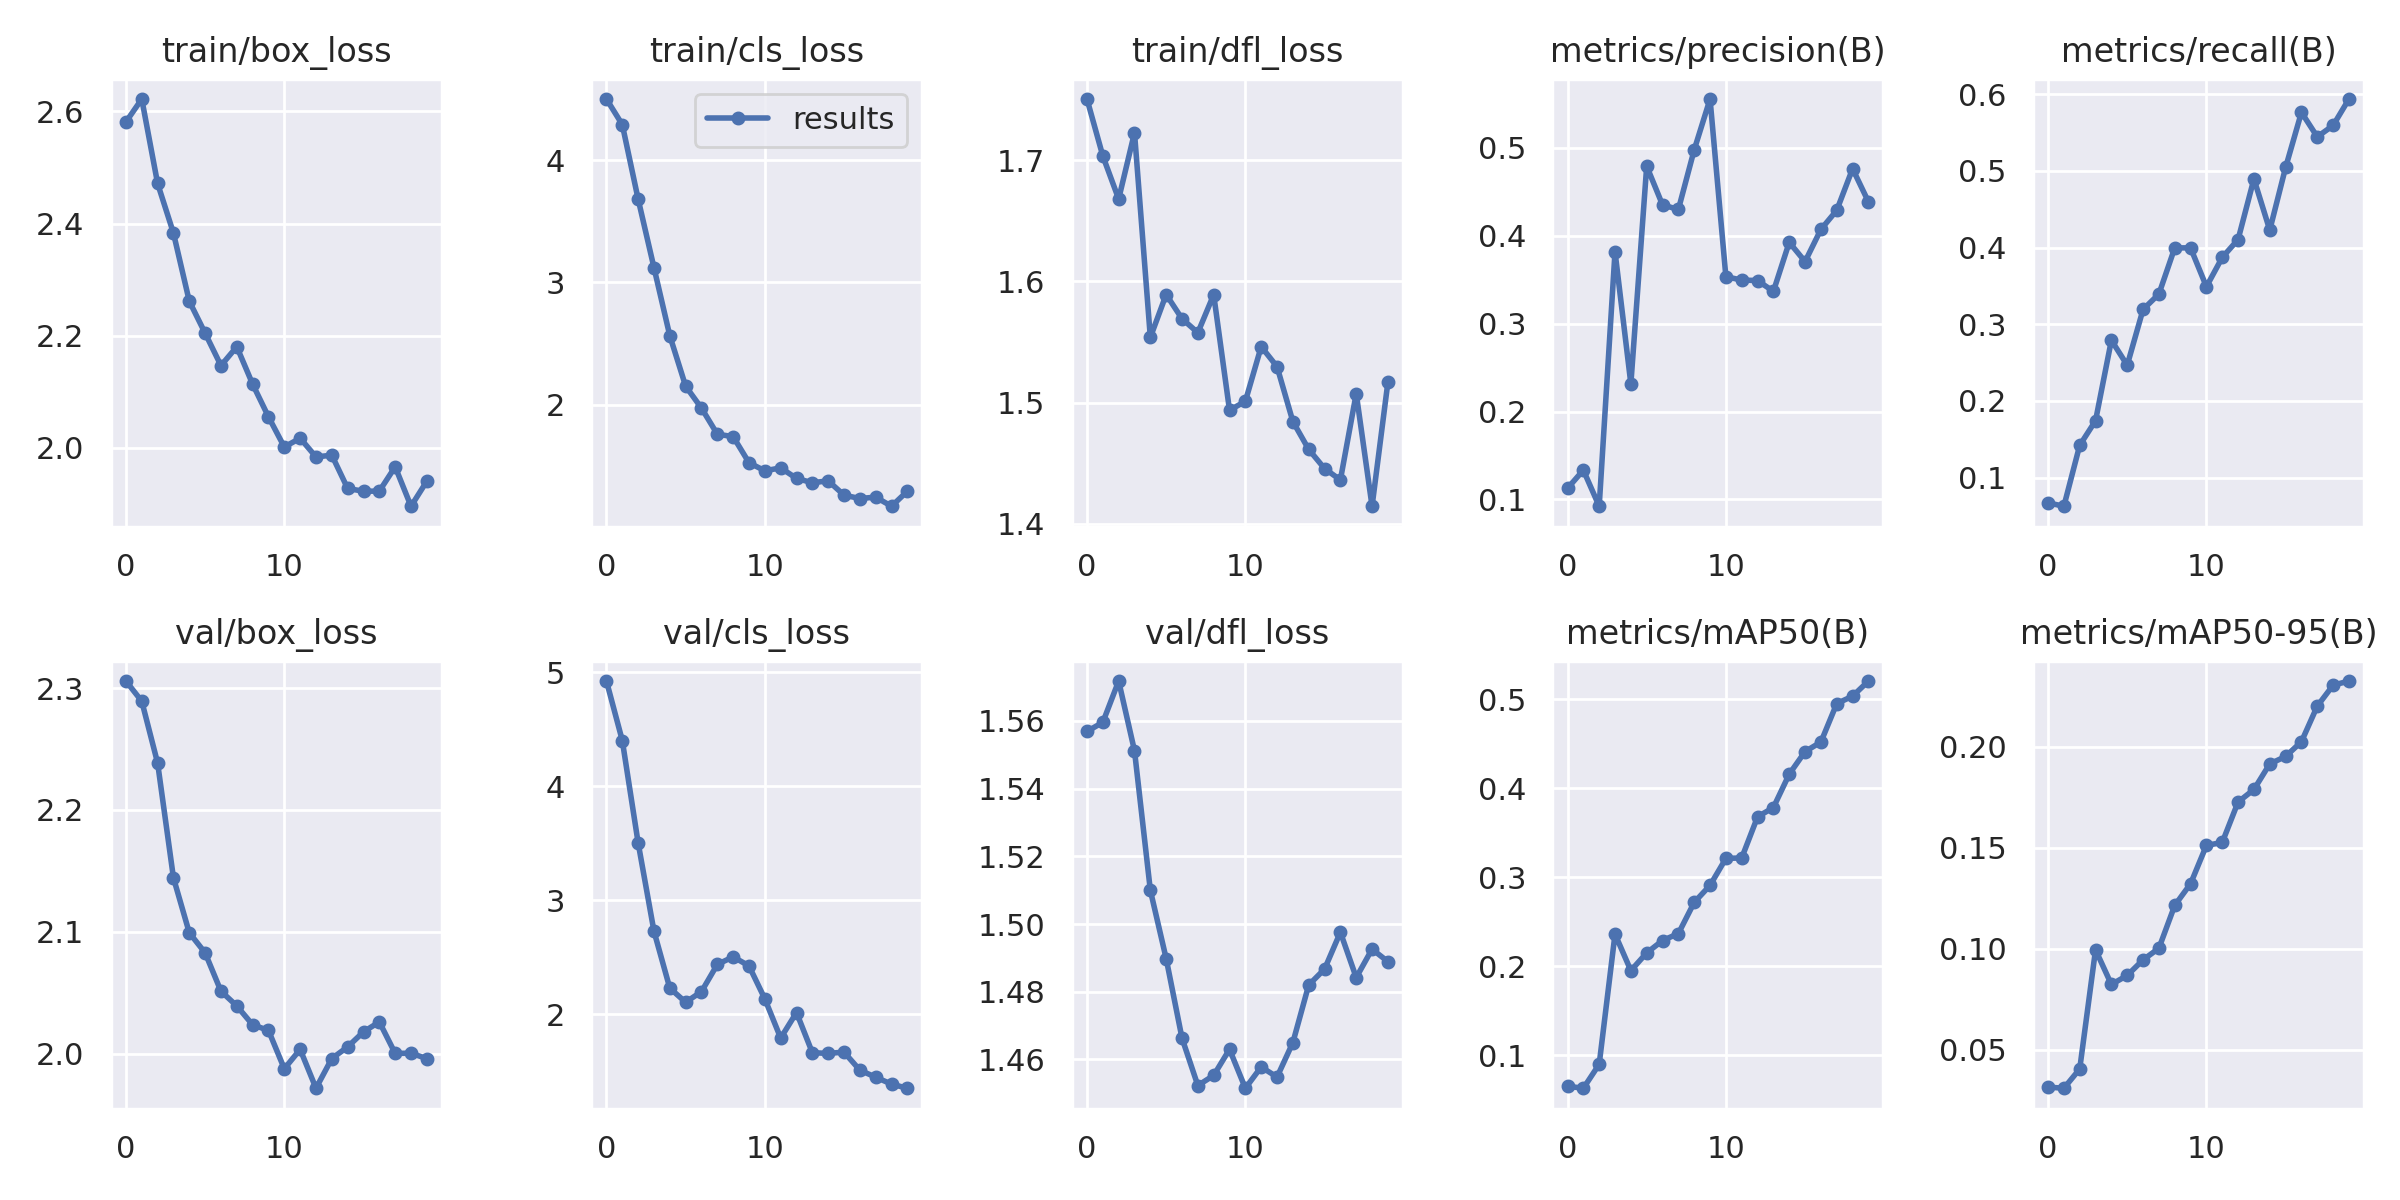

In [27]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train2/results.png', width=600)

[Errno 2] No such file or directory: '{HOME}'
/content


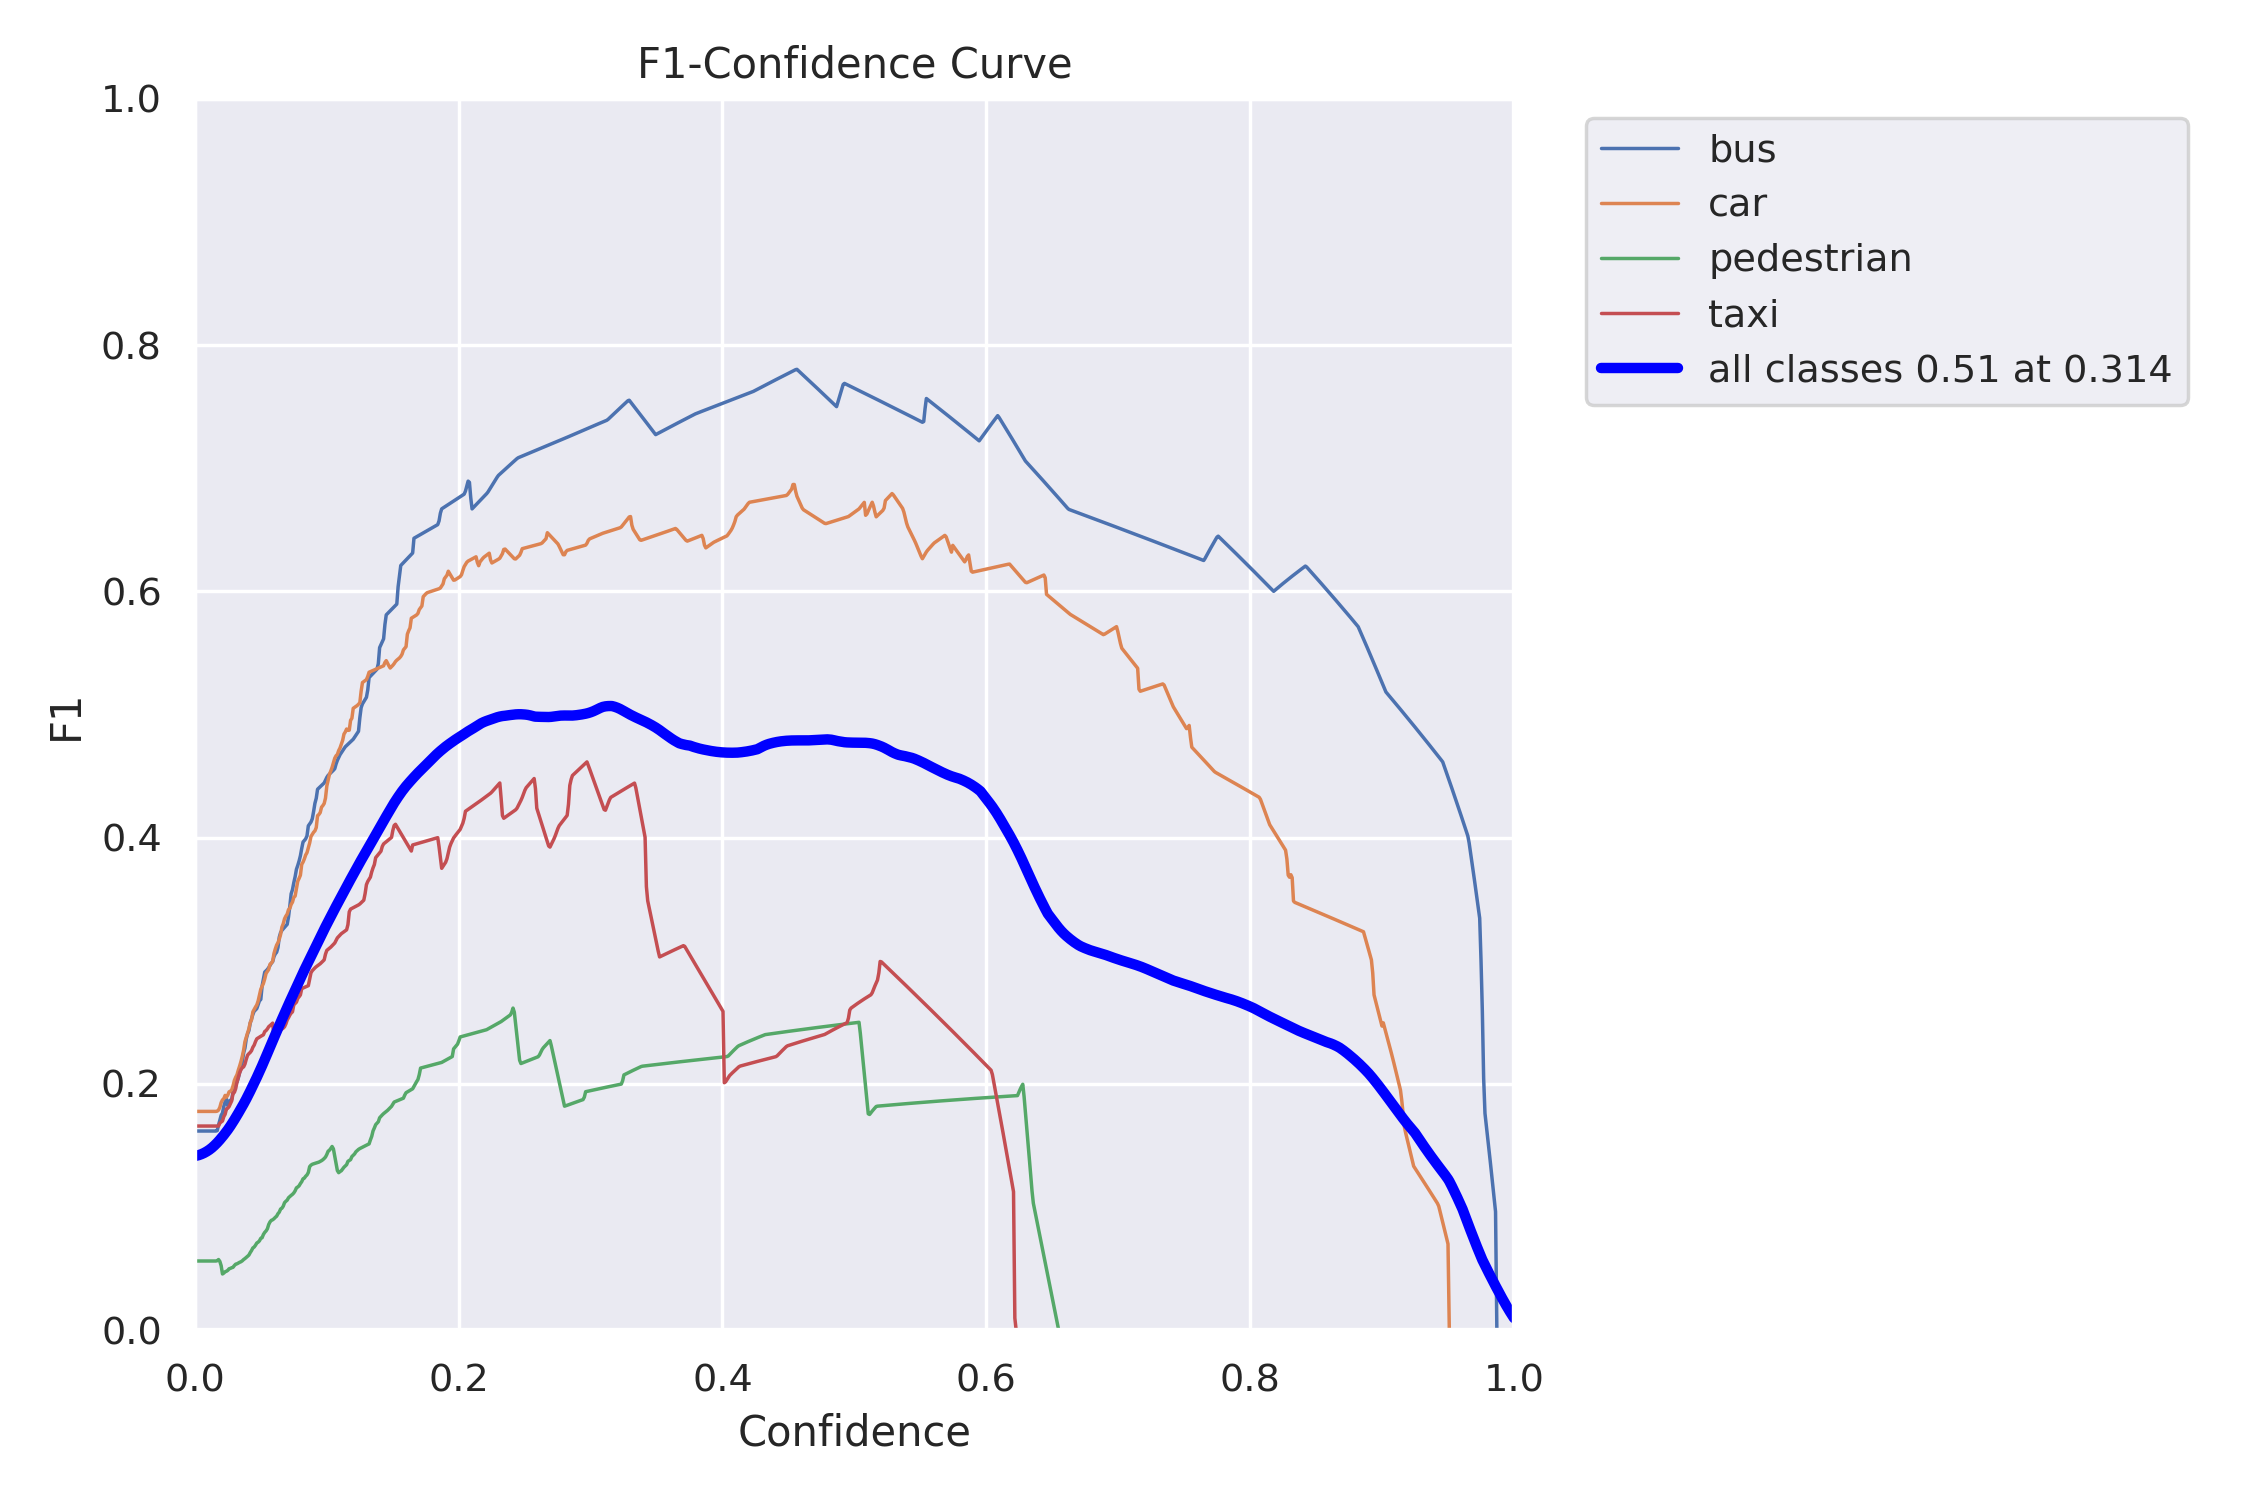

In [28]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train2/F1_curve.png', width=600)

In [29]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
2024-1

In [30]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
2024-1

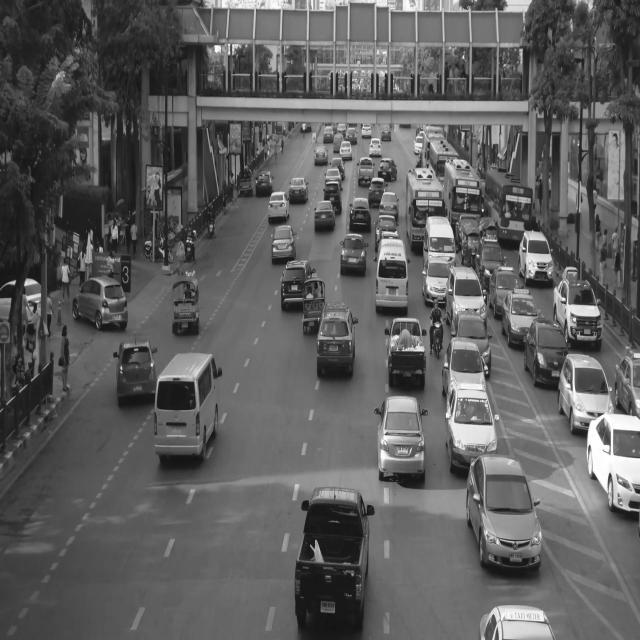

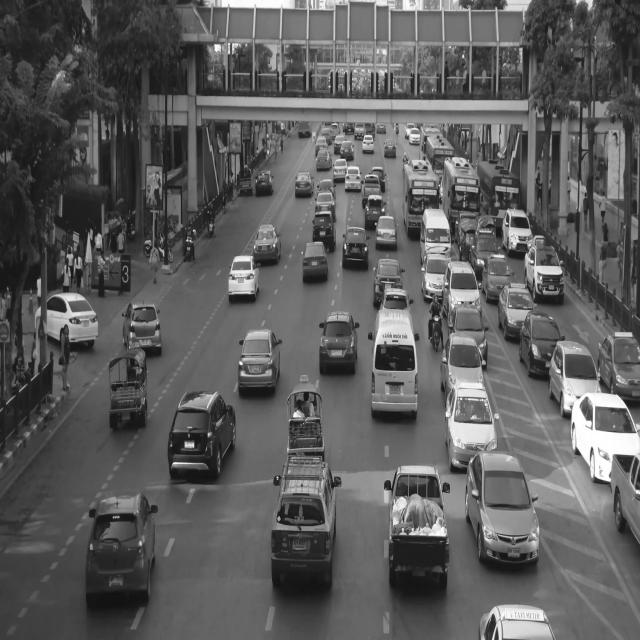

In [66]:
#show test images
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/PMU-B-2/test/images/*.jpg'):
    display(Image(filename=image_path, width=600))
    print("\n")

for image_path in glob.glob('/content/PMU-B-2/test/images/*.png'):
    display(Image(filename=image_path, width=600))
    print("\n")

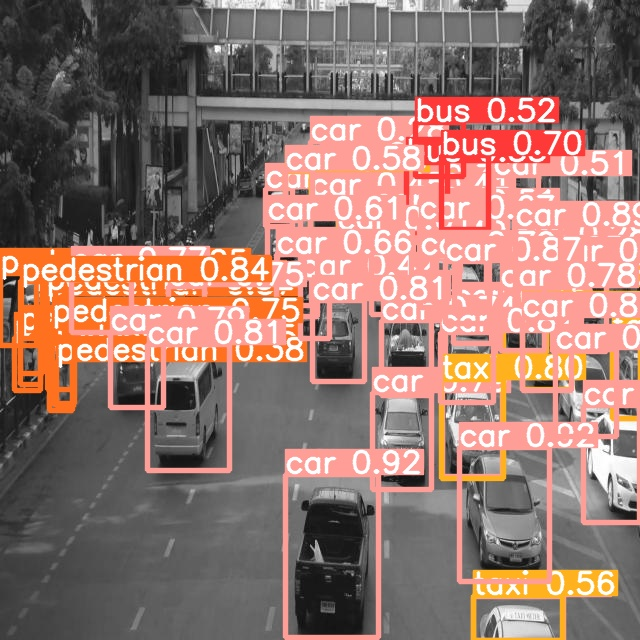

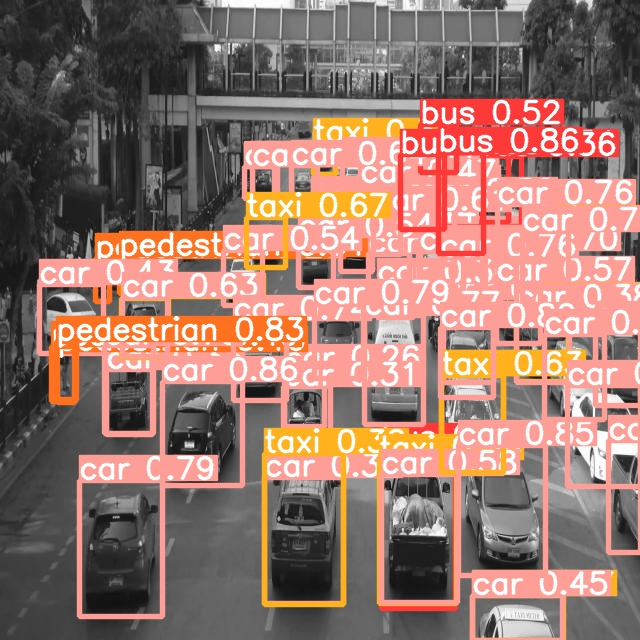

In [67]:
#show predict image
for image_path in glob.glob('/content/runs/detect/predict2/*.jpg'):
    display(Image(filename=image_path, width=600))
    print("\n")

for image_path in glob.glob('/content/runs/detect/predict2/*.png'):
    display(Image(filename=image_path, width=600))
    print("\n")